<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


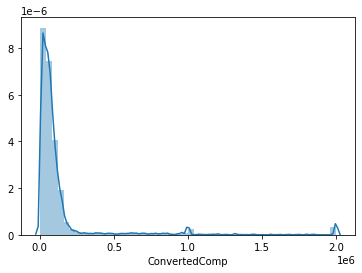

In [4]:
# your code goes here
df[df['ConvertedComp'].isnull()]
df.dropna(subset=["ConvertedComp"], axis=0, inplace= True)
df.reset_index(drop=True, inplace= True)
sns.distplot(df["ConvertedComp"], kde = True)
plt.show()


Plot the histogram for the column `ConvertedComp`.


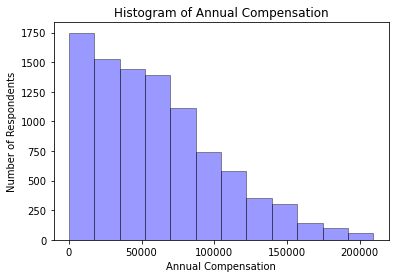

In [26]:
# your code goes here
sns.distplot(df['ConvertedComp'], hist=True, kde=False, 
             bins=int(120/10), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Annual Compensation')
plt.xlabel('Annual Compensation')
plt.ylabel('Number of Respondents')
plt.show()


What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
Median= df["ConvertedComp"].median()
print(Median)

57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
df.groupby('Gender')['Respondent'].count()

Gender
Man                                                            9725
Man;Non-binary, genderqueer, or gender non-conforming            26
Non-binary, genderqueer, or gender non-conforming                59
Woman                                                           679
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Woman;Non-binary, genderqueer, or gender non-conforming          14
Name: Respondent, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
df_woman=df[df['Gender']=='Woman']
df_woman['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
summary =df["Age"]
summary.describe()

#Calculation for median age of survey respondent:
Median= df["Age"].median()
print(Median)

29.0


Plot a histogram of the column `Age`.


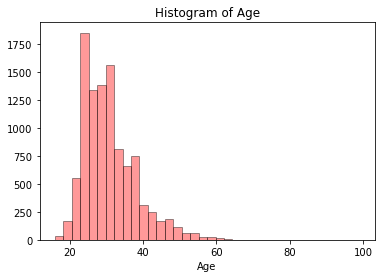

In [10]:
# your code goes here
#Dropping missing values in column age:

df.dropna(subset=["Age"], axis=0, inplace= True)
df.reset_index(drop=True, inplace= True)

#Plotting chart:
sns.distplot(df['Age'], hist=True, kde=False, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


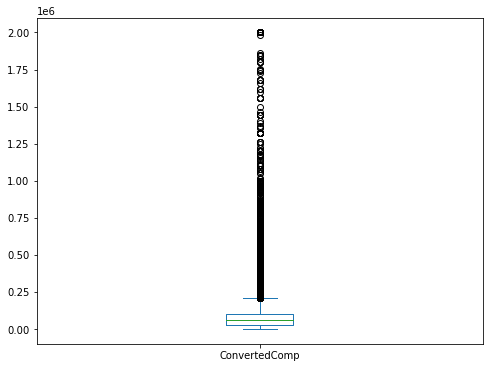

,Age
count,10354.000000
mean,30.833040
std,7.389983
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


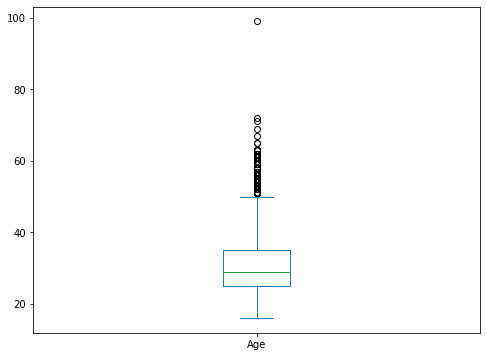

In [11]:
# your code goes here
boxplot = pd.DataFrame(data=df['ConvertedComp'])
boxplot.plot(kind='box', figsize=(8,6))
plt.show()
boxplot.describe()

#Box plot for Age
boxplotage = pd.DataFrame(data=df['Age'])
boxplotage.plot(kind='box', figsize=(8,6))
boxplotage.describe()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# your code goes here
boxplot.describe()
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR= Q3-Q1 #Interquartile range
IQR



73165.5

Find out the upper and lower bounds.


In [13]:
# your code goes here
lowerbound = Q1-1.5*IQR
upperbound= Q3+1.5*IQR

print(lowerbound, upperbound)

-82913.75 209748.25


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# your code goes here
((df["ConvertedComp"]<lowerbound)| (df["ConvertedComp"]>upperbound)).sum()


861

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# your code goes here
df = df[~((df["ConvertedComp"] < (Q1 - 1.5 * IQR)) |(df["ConvertedComp"] > (Q3 + 1.5 * IQR)))]

# verification of outlier removal:
((df["ConvertedComp"]<lowerbound)| (df["ConvertedComp"]>upperbound)).sum()

#Calculation of Median and Mean after removing outlier for column ConvertedComp:
Median= df["ConvertedComp"].median()
print(Median)
mean = df["ConvertedComp"].mean()
print(mean)


0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [20]:
# your code goes here
df[['Respondent', 'CompTotal','ConvertedComp', 'WorkWeekHrs','CodeRevHrs','Age']].corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019281,0.010916,-0.017491,0.004692,0.002180
CompTotal,-0.019281,1.000000,-0.063574,0.004667,0.015992,0.006337
ConvertedComp,0.010916,-0.063574,1.000000,0.033110,-0.086527,0.401821
WorkWeekHrs,-0.017491,0.004667,0.033110,1.000000,0.038948,0.032032
CodeRevHrs,0.004692,0.015992,-0.086527,0.038948,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
